In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('5.1-scalerdata.csv')

In [3]:
df.head()

,normal_feature,positive_skewed,with_outliers
0,52.483571,5.402733,30.039006
1,49.308678,2.511673,34.360602
2,53.238443,1.276804,29.206030
3,57.615149,4.119086,38.160507
4,48.829233,28.631211,31.877002


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   normal_feature   100 non-null    float64
 1   positive_skewed  100 non-null    float64
 2   with_outliers    100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


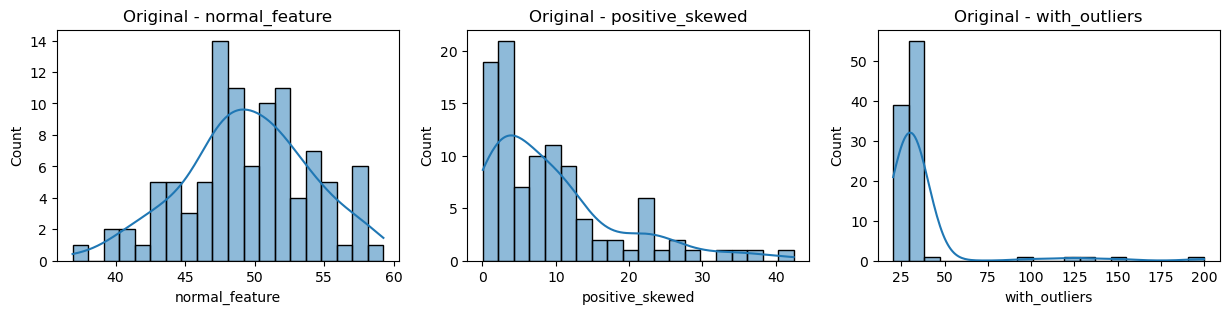

In [6]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Original - {col}")

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#3 tane scalerımız var
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

scaled_dfs = {}

for name, scaler in scalers.items():
    scaled = scaler.fit_transform(df)
    scaled_dfs[name] = pd.DataFrame(scaled, columns=df.columns)
    

In [8]:
scaled_dfs

{'StandardScaler':     normal_feature  positive_skewed  with_outliers
 0         0.664619        -0.443597      -0.220891
 1        -0.038089        -0.764448      -0.050276
 2         0.831697        -0.901494      -0.253777
 3         1.800406        -0.586057       0.099742
 4        -0.144206         2.134306      -0.148328
 ..             ...              ...            ...
 95       -1.504697        -0.732782       2.541141
 96        0.442629         2.965757       3.330732
 97        0.403824        -0.488972       3.725528
 98        0.120582         1.427288       4.515120
 99       -0.144686         0.063650       6.489100
 
 [100 rows x 3 columns],
 'MinMaxScaler':     normal_feature  positive_skewed  with_outliers
 0         0.696879         0.126257       0.054321
 1         0.554890         0.058055       0.078367
 2         0.730639         0.028924       0.049686
 3         0.926376         0.095975       0.099510
 4         0.533448         0.674233       0.064548
 ..

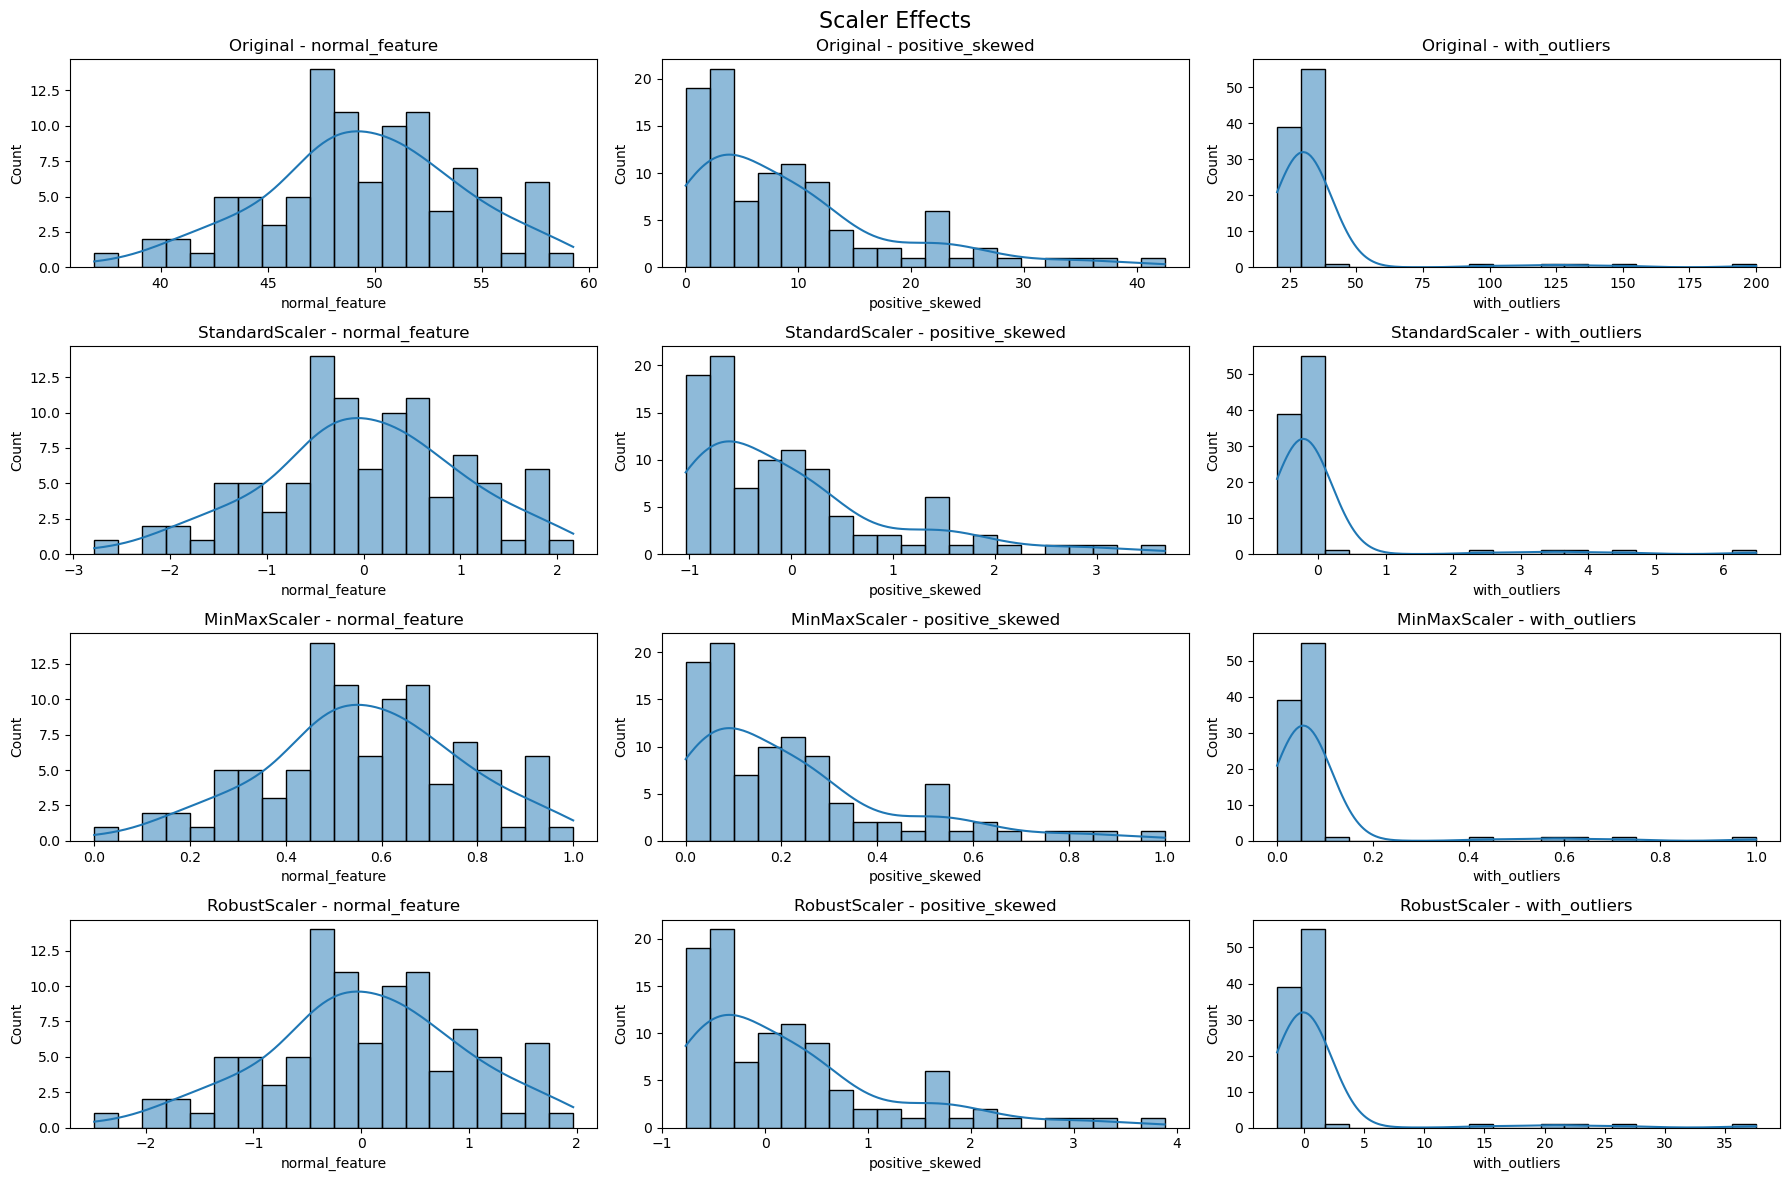

In [9]:
def plot_histograms(scaled_dfs, df_original):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
    fig.suptitle("Scaler Effects", fontsize=16)

    for i, col in enumerate(df_original.columns):
        sns.histplot(df_original[col], kde=True, ax=axes[0, i], bins=20)
        axes[0, i].set_title(f"Original - {col}")

    for row, (name, sdf) in enumerate(scaled_dfs.items(), start=1):
        for i, col in enumerate(sdf.columns):
            sns.histplot(sdf[col], kde=True, ax=axes[row, i], bins=20)
            axes[row, i].set_title(f"{name} - {col}")

    plt.tight_layout()
    plt.show()

plot_histograms(scaled_dfs, df)

In [10]:
# standar scaler - > z-score standardization, normal - near normal distribution works well, gradient based algorithms
# logistic regression, svm, pca etc.
# formula: (Z) -> x - mu / sigma 

# min max scaler -> normalization, between 0 - 1. works well with scale sensitive algorithms, knn, k-means etc.
# formula: x - x(min) / x(max) - x(min)

# robust scaler -> works well with outliers
# formula: x - median / IQR